# Learning with backprop and generalisation in multi-layer perceptron

This exercise is concerned with supervised learning approaches for feed-forward multilayer networks - MLP (MLPs)



## Classification and regression with a two-layer perceptron

### Classification of linearly non-separable data


In [5]:
import numpy as np
import matplotlib.pyplot as plt


# Sigmoid function with range [-1, 1]
def sigmoid(x):
    return 2 / (1 + np.exp(-x)) - 1


# Gives the derivative of the sigmoid function
def sigmoid_derivative(x):
    return 0.5 * ((1 + sigmoid(x)) * (1 - sigmoid(x)))


# Forward propagation
def forward(X, first_layer, hidden_layer):
    # Output first layer
    WX = first_layer.dot(X)
    H = sigmoid(WX)
    # Output second layer
    H = np.vstack([H, np.ones(np.shape(H)[1])])  # Add bias
    VH = hidden_layer.dot(H)
    # Predicted output
    O = sigmoid(VH)
    return O, H


# Backward propagation
def backward(T, O, H, V, Nhidden):
    delta_o = (O - T) * (sigmoid_derivative(O))
    delta_h = np.dot(V.T, delta_o) * (sigmoid_derivative(H))
    delta_h = delta_h[0:Nhidden]
    return delta_o, delta_h


# Update the weights
def weightUpdate(delta_o, delta_h, X, H, W, V, eta, dw, dv, alpha):
    dw = alpha * dw - (1 - alpha) * (delta_h.dot(X.T))
    W = W + eta * dw
    V = V + eta * dv
    return W, V, dw, dv


def backpropagation(X, T, W, V, eta, epochs, Nhidden, alpha=0.9):
    errors_list = []
    misclassifications_list = []
    dw = np.ones(np.shape(W))
    dv = np.ones(np.shape(V))
    all_weights1 = []
    all_weights2 = []
    for i in range(epochs):
        all_weights1.append(W)
        all_weights2.append(V)
        O, H = forward(X, W, V)

        number_misclassifications = np.shape(X)[1] - np.sum(np.round(O) == T)
        ratio = number_misclassifications / (np.shape(X)[1])
        misclassifications_list.append(ratio)
        errors_list.append(np.mean(np.square(O - T)))

        delta_o, delta_h = backward(T, O, H, V, Nhidden)

        W, V, dw, dv = weightUpdate(delta_o, delta_h, X, H, W, V, eta, dw, dv, alpha)

    all_weights1.append(W)
    all_weights2.append(V)
    return W, V, errors_list, misclassifications_list, all_weights1, all_weights2


# Predict the output
def predict(data, weights, hidden_weights, clasification=True):
    output, _ = forward(data, weights, hidden_weights)
    if clasification:
        output[output >= 1] = 1
        output[output < 0] = -1
    return output

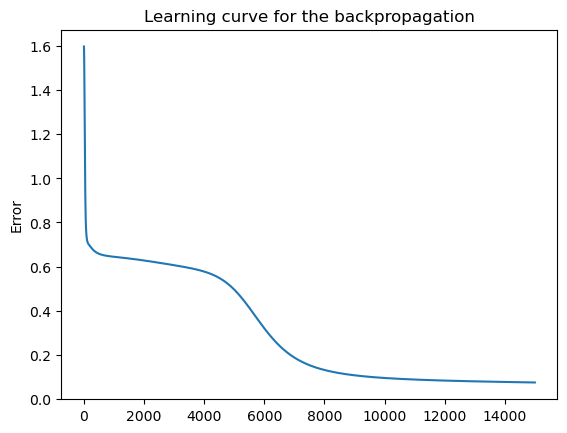

In [6]:
mA = [1, 0.3]
sigmaA = 0.2
mB = [0, -0.1]
sigmaB = 0.3

# Backpropagation parameters
epochs = 15000
eta = 0.0005
Nhidden = 5


# Generate the classes. 2 dimensional with 100 points each
classA = np.zeros((2, 100))
classB = np.zeros((2, 100))

classA[0] = np.concatenate(
    (
        np.random.randn(1, int(0.5 * 100)) * sigmaA - mA[0],
        np.random.randn(1, int(0.5 * 100)) * sigmaA + mA[0],
    ),
    axis=1,
)
classB[0] = np.random.randn(1, 100) * sigmaB + mB[0]
classA[1] = np.random.randn(1, 100) * sigmaA + mA[1]
classB[1] = np.random.randn(1, 100) * sigmaB + mB[1]
classA = classA.T
classB = classB.T
np.random.shuffle(classA)
np.random.shuffle(classB)
classA = classA.T
classB = classB.T

# Creating the dataset
dataset = np.concatenate((classA, classB), axis=1)
dataset = np.concatenate((dataset, np.ones((1, np.shape(dataset)[1]))))
targets = np.concatenate((np.ones(np.shape(classA)[1]), -np.ones(np.shape(classB)[1])))
s = np.arange(dataset.shape[1])

# SHuffle the dataset
np.random.shuffle(s)
patterns = dataset[:, s]
targets = targets[s]

# Initialize the weights
weights1 = np.random.randn(Nhidden, np.shape(patterns)[0])
weights2 = np.random.randn(1, Nhidden + 1)

(
    W,
    V,
    errors_list,
    misclassifications_list,
    all_weights1,
    all_weights2,
) = backpropagation(
    patterns, targets, weights1, weights2, eta, epochs, Nhidden, alpha=0.9
)


plt.plot(errors_list)
plt.title("Learning curve for the backpropagation")
plt.xlabel = "Epochs"
plt.ylabel("Error")
plt.show()